# Statistical Modeling

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import pymc3 as pm
# For bayesian inference

### Bayesian inference

A type of statistical inference

- We do not make ***estimates*** of population parameters
- Rather, we maintain ***probablity distributions*** for population distributions, which represent our quantitative belief about their value
- We start with probablity ***priors***, and we use and make ***observations*** to update them to probablity ***posteriors***

***Prior *** p(1) = p(2) = 0.5 --->

***Observation *** <i> After observation if we are more incline to to p(1) </i> ---> 

***Posterior *** p(1) = 1, p(2) = 0 (100%, 0%)

#### Bayes Theorem

For more general distributions the update rule is called "Bayes Theorem"

Posterior  Likelihood+   Prior
p(θ|y) =      p(y|θ)     p(θ)   /   ∫p(y|θ)p(θ)d(θ)

+Likelihood: probablity of gettting data for given population parameters

Small note: ∫ == the integral symbol

In [6]:
# Coin example
n = 100
k = 61

with pm.Model() as coin_context:
    p = pm.Uniform('p', 0.40, 0.80) # theorem is the probility in-between .4 and .8
    
    y = pm.Binomial('y', n=n, p=p, observed=k)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:07<00:00, 2690.99draws/s]
The acceptance probability does not match the target. It is 0.656532084696, but should be close to 0.8. Try to increase the number of tuning steps.


In [7]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p,0.608397,0.047585,0.000449,0.508993,0.696161,10430.689483,1.000023


The mean is 60% which is the most probable biasness of the coin. SD is around 5%. The HPD, delimented credible interval, analog to a confidence interval, cointainuing 95% of the probablilty.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c184c0f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c184f9a20>]], dtype=object)

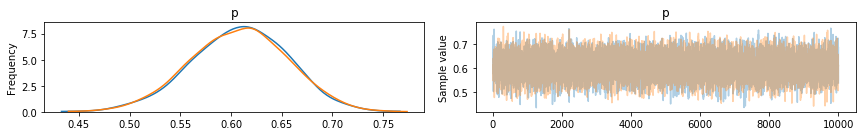

In [8]:
pm.traceplot(trace)

There are two plots because Pymc3 runs two sets of sampling.

#### Bayesian Statistical Modeling

In [9]:
gdata = pd.read_csv('05_06/gapminder.csv').query('year == 1985')

In [10]:
gdata.sort_values('age5_surviving', inplace=True)

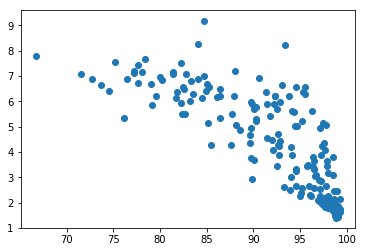

In [11]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])

In [18]:
with pm.Model() as gapminder_context:
        intercept = pm.Uniform('intercept',5, 15)
        slope = pm.Uniform('slope', -1, 1)
        
        babies = pm.Normal('babies', mu = intercept + slope * (gdata['age5_surviving'] -65), sd = 1, observed = gdata['babies_per_woman'])
        
        trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:18<00:00, 1120.03draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [19]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,10.194901,0.279167,0.004685,9.639402,10.731790,3555.601052,1.000438
slope,-0.219248,0.010129,0.000170,-0.238813,-0.199247,3657.097265,1.000426


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1dbe7a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1d839cf8>]], dtype=object)

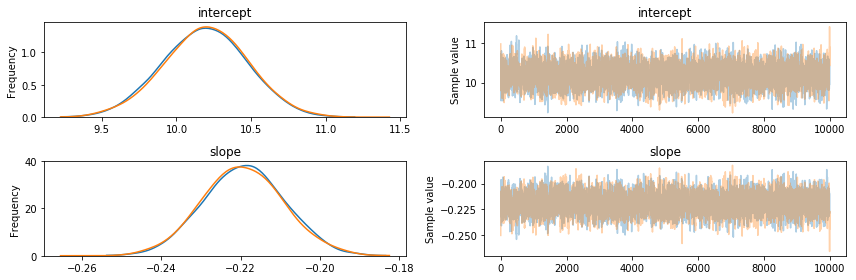

In [20]:
pm.traceplot(trace)

Evaluated at the mean of the posterior, the model would look like this. I'm taking mean values from the posterior. And now I'll multiply by the explanatory variable.

In [21]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

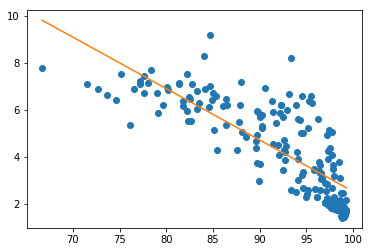

In [22]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'], babies, 'C1')

This is the Bayesian fit plot over the data.

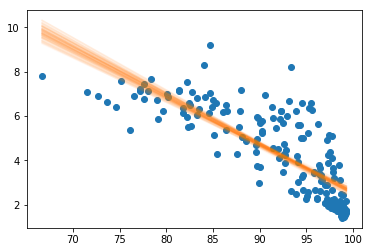

In [23]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100), trace['intercept'][::50], trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'], babies, 'C1', alpha=0.05)

This is the bundle of models within the posterior